In [1]:
import pandas as pd

df = pd.read_csv('./data/unprocessed/tripadvisor_hotel_reviews.csv')

df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


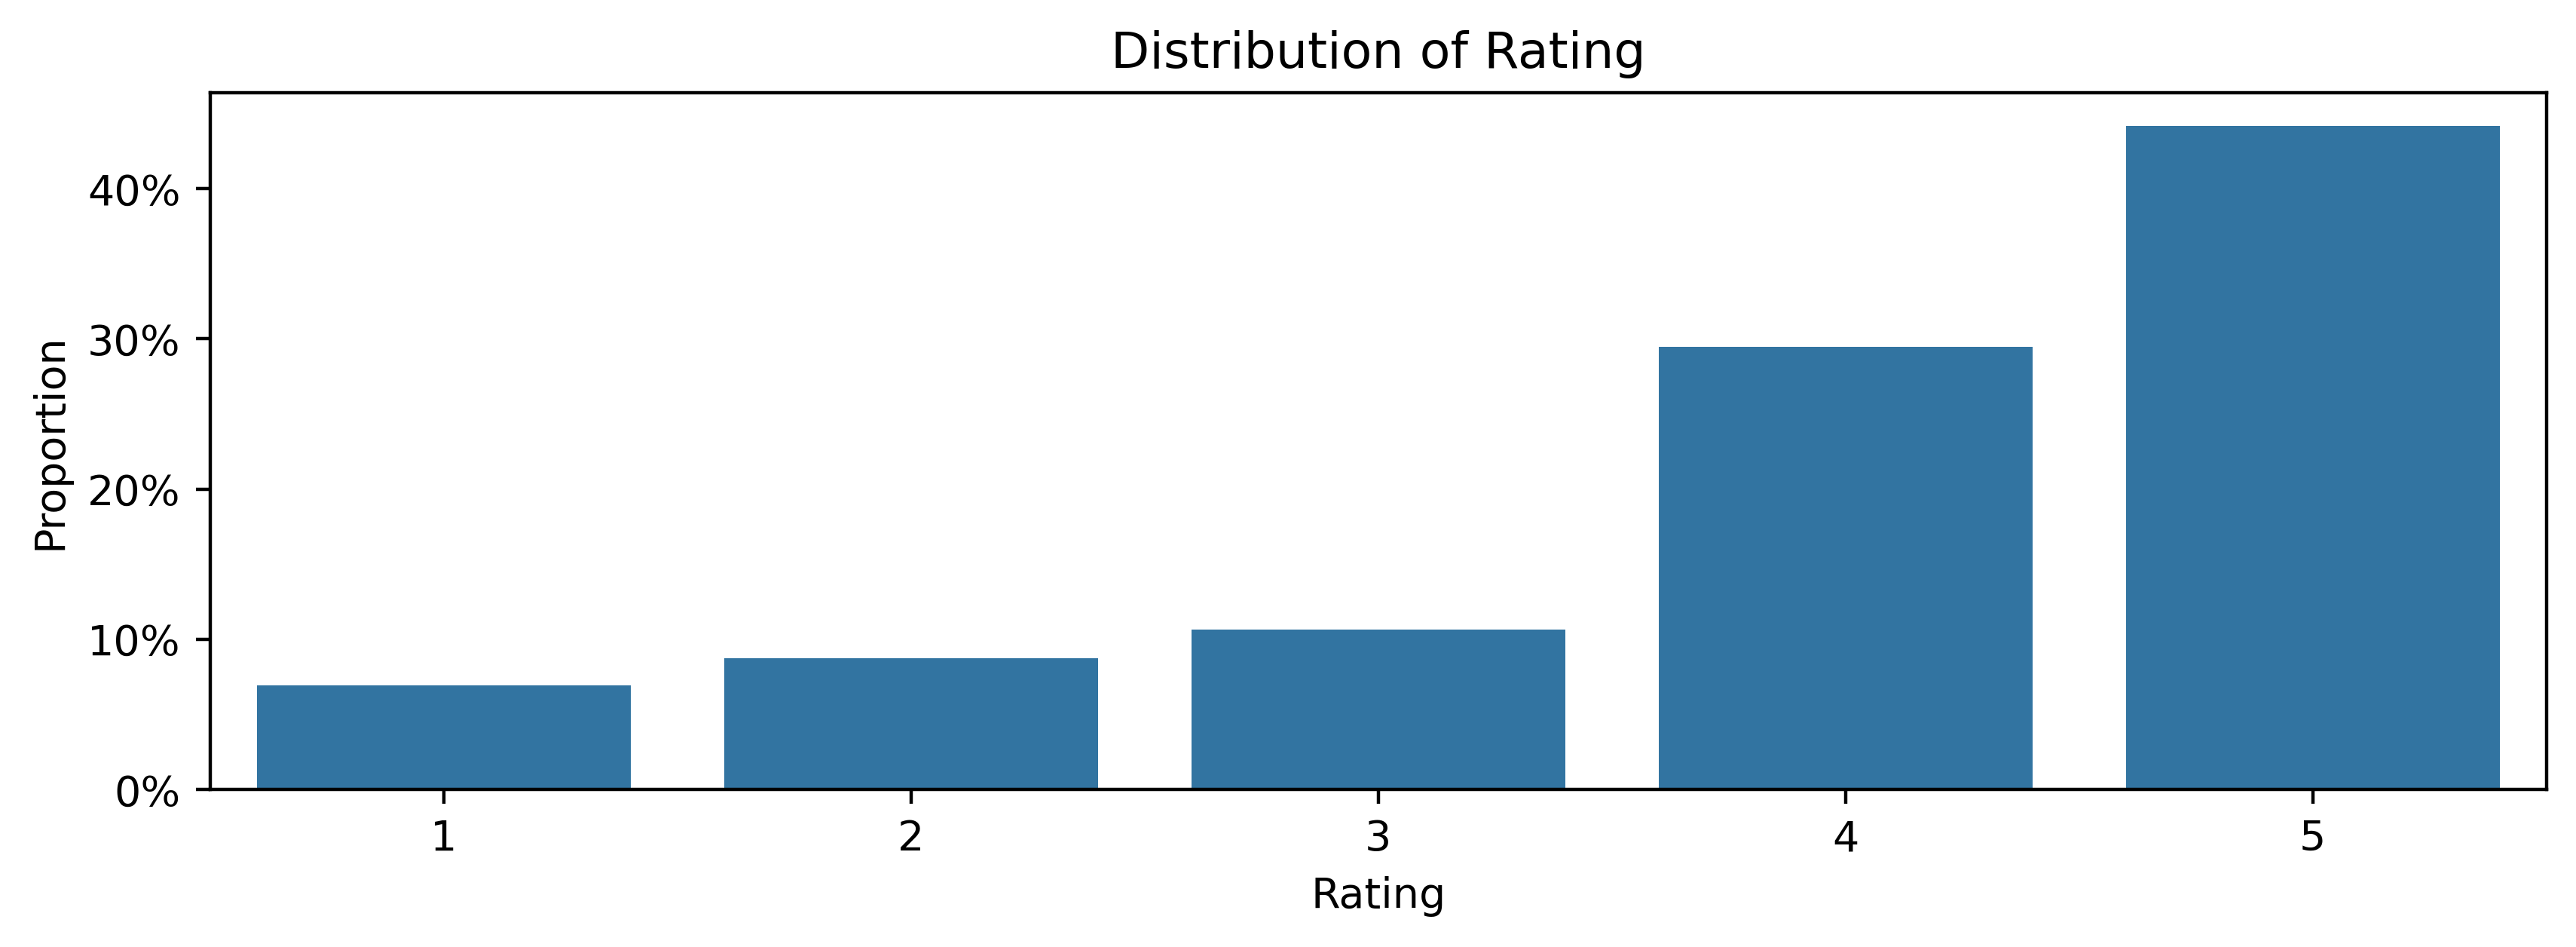

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

df_proportions = df['Rating'].value_counts(normalize=True).reset_index()
df_proportions.columns = ['Rating', 'Proportion']

plt.figure(figsize=(10, 3), dpi=400)

sns.barplot(
    data=df_proportions, 
    x='Rating', 
    y='Proportion',
    color=sns.color_palette(n_colors=1)[0],    
)

def to_percent(y, _):
    return '{:.0%}'.format(y)

formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Distribution of Rating')

plt.show()

In [3]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white', random_state=22).generate(' '.join(df['Review']))

wordcloud

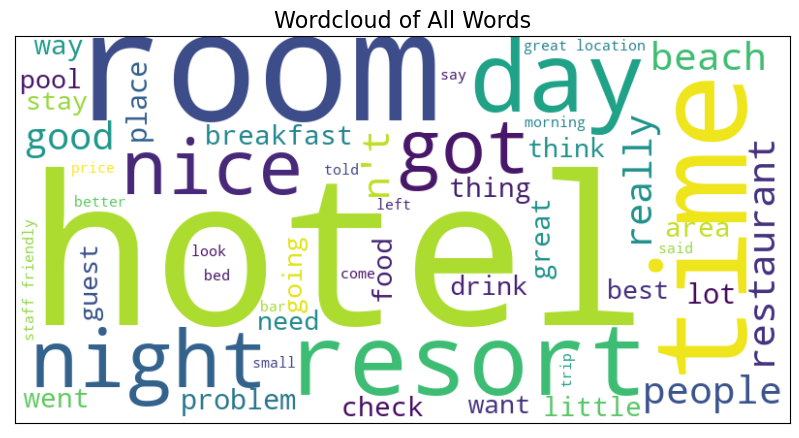

In [4]:
plt.figure(figsize=(10, 6))

plt.imshow(wordcloud, interpolation='bilinear')

plt.xticks([])
plt.yticks([])

plt.title('Wordcloud of All Words', fontsize=16)

plt.show()

In [5]:
df_mod = pd.read_parquet('./data/preprocessed/df_mod.parquet')

df_mod

,Rating,a (Negative),aa (Positive),abac (Positive),ability (Negative),ability (Positive),abode (Positive),abound (Positive),abrasion (Positive),abrasive (Negative),...,yorker (Positive),young (Negative),yuan (Negative),yuck (Positive),yummy (Positive),zipper (Negative),zombie (Positive),zone (Negative),zone (Positive),zoo (Positive)
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20487,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20488,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20489,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Remove words that are not used in at least 1% of reviews

In [39]:
df_mod = df_mod.loc[:, (df_mod.mean() >= 0.01)]

df_mod

,Rating,access (Positive),activity (Positive),amenity (Positive),area (Negative),area (Positive),atmosphere (Positive),bar (Positive),bathroom (Negative),bathroom (Positive),...,view (Negative),view (Positive),visit (Positive),walk (Positive),water (Positive),way (Negative),way (Positive),week (Positive),weekend (Positive),wife (Positive)
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20487,4,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
20488,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20489,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Only include features that give relevant feedback to hotels

In [40]:
columns_to_remove = [
    'beach (Positive)',
    'bit (Positive)',
    'card (Positive)',
    'complaint (Negative)',
    'couple (Positive)',
    'day (Negative)',
    'day (Positive)',
    'experience (Negative)',
    'experience (Positive)',
    'family (Positive)',
    'friend (Positive)',
    'fun (Positive)',
    'guest (Positive)',
    'ground (Positive)',
    'holiday (Positive)',
    'hotel (Negative)',
    'hotel (Positive)',
    'hour (Positive)',
    'husband (Positive)',
    'job (Positive)',
    'lot (Positive)',
    'minute (Positive)',
    'morning (Positive)',
    'night (Negative)',
    'night (Positive)',
    'person (Positive)',
    'point (Positive)',
    'problem (Negative)',
    'problem (Positive)',
    'review (Negative)',
    'review (Positive)',
    'stay (Positive)',
    'thing (Negative)',
    'thing (Positive)',
    'time (Negative)',
    'time (Positive)',
    'touch (Positive)',
    'towel (Positive)',
    'trip (Positive)',
    'use (Positive)',
    'vacation (Positive)',
    'visit (Positive)',
    'water (Positive)',
    'way (Negative)',
    'way (Positive)',
    'week (Positive)',
    'weekend (Positive)',
    'wife (Positive)',
]

df_mod = df_mod.loc[:, ~df_mod.columns.isin(columns_to_remove)]

df_mod

,Rating,access (Positive),activity (Positive),amenity (Positive),area (Negative),area (Positive),atmosphere (Positive),bar (Positive),bathroom (Negative),bathroom (Positive),...,size (Positive),spot (Positive),staff (Negative),staff (Positive),station (Positive),suite (Positive),value (Positive),view (Negative),view (Positive),walk (Positive)
0,4,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20487,4,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
20488,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20489,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df_nouns = df_mod.drop(columns=['Rating'])
df_nouns.columns = df_nouns.columns.str.replace(' (Positive)', '', regex=False).str.replace(' (Negative)', '', regex=False)
df_nouns.groupby(df_nouns.columns, axis=1).sum()  # combine positive and negative nouns for the wordcloud

noun_freq_dict = dict(zip(df_nouns.columns, df_nouns.mean().values))

len(noun_freq_dict)

51

In [73]:
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white', random_state=22).generate_from_frequencies(noun_freq_dict)

wordcloud

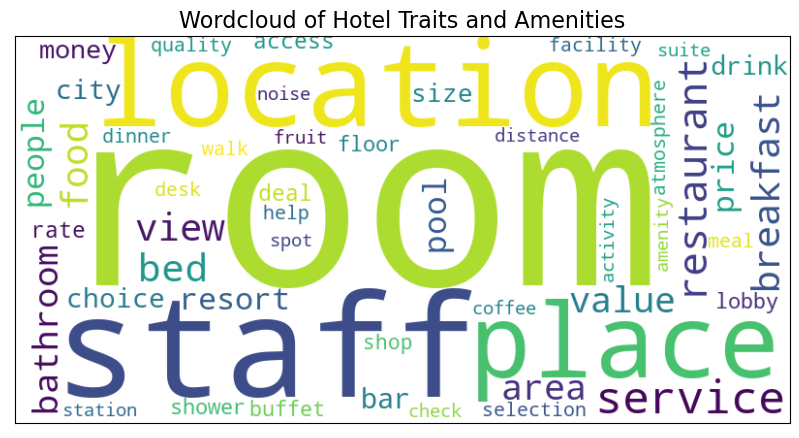

In [76]:
plt.figure(figsize=(10, 6))

plt.imshow(wordcloud, interpolation='bilinear')

plt.xticks([])
plt.yticks([])

plt.title('Wordcloud of Hotel Traits and Amenities', fontsize=16)

plt.show()